In [1]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dgx2dclass = u"""
1	597.00
2	311.00
4	158.00
8	82.67"""
dgx2dclass_v100 = u"""
1	324.00
2	170.00
4	88.17
8	47.17"""

In [3]:
dgx3dclass = u"""
1	52.00
2	30.50
4	18.50
8	14.20
"""

In [4]:
m32dclass = u"""
2	350
4	176
8	89"""

In [5]:
def numpyfromdata(data):
    from io import StringIO
    StringIO(data)
    return np.loadtxt(StringIO(data),skiprows=1,delimiter='	')

In [6]:
dgx2dclass_arr = numpyfromdata(dgx2dclass)
dgx2dclass_v100_arr = numpyfromdata(dgx2dclass_v100)
dgx3dclass_arr = numpyfromdata(dgx3dclass)
m32dclass_arr = numpyfromdata(m32dclass)

In [7]:
def add_ax_scaling(data,label,linestyle):
#     singlegputime = data[np.where(data[:,0]==1.),1]
#     singlegputime = 1.
    gpus   = data[:,0]
    itsper = 5./data[:,1]
    comparison_gpu = 2 
    column = np.where(gpus==comparison_gpu)
    itersper_first = itsper[column]
    itsper /= itersper_first
    ax2.plot(gpus,itsper*gpus[column],label=label, marker='o',linestyle=linestyle)

def add_ax_iterations(data,label,linestyle):
#     singlegputime = data[np.where(data[:,0]==1.),1]
#     singlegputime = 1.
    gpus   = data[:,0]
    itsper = 5./data[:,1]
    ax1.plot(gpus,itsper,label=label, marker='o',linestyle=linestyle)

<IPython.core.display.Javascript object>


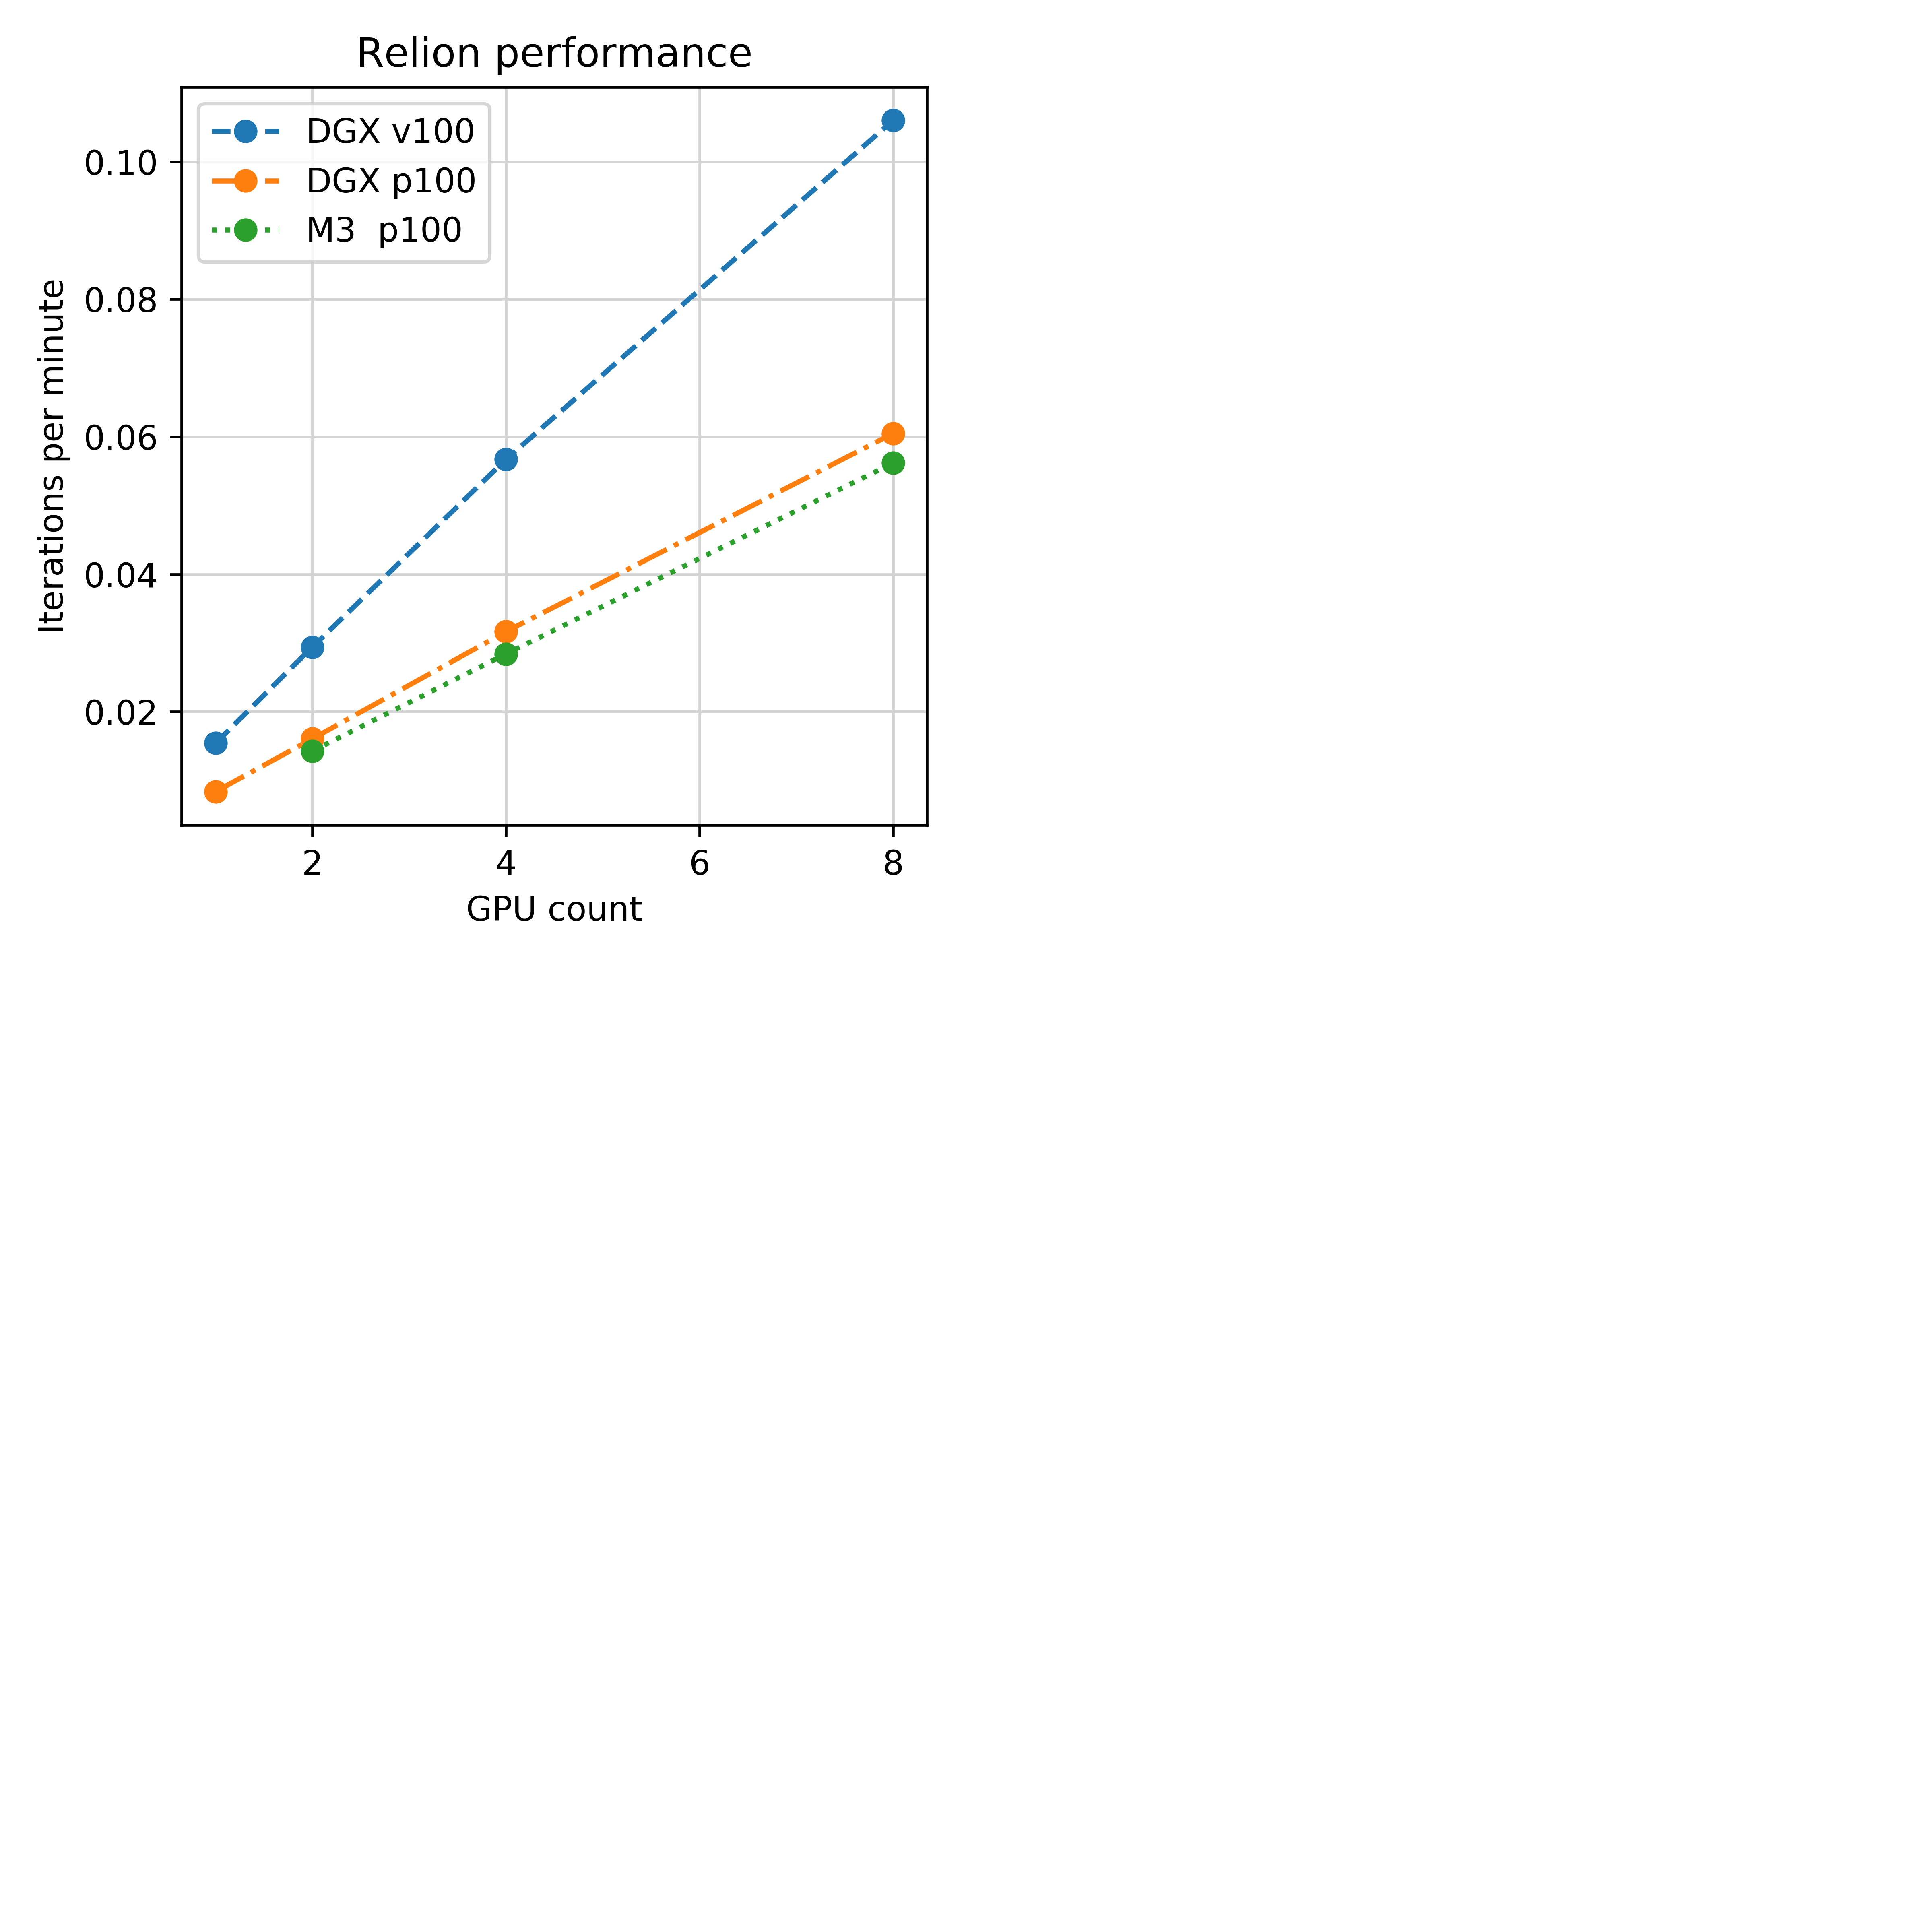

In [13]:
fig = plt.figure(figsize=(4,4),dpi=300)
ax1 = fig.add_subplot(111,title="Relion performance")
ax1.set_ylabel("Iterations per minute")
ax1.set_xlabel("GPU count")

for njobs in ((dgx2dclass_v100_arr,'DGX v100','--'),(dgx2dclass_arr,'DGX p100','-.'),(m32dclass_arr,'M3  p100',':'),):
    add_ax_iterations(njobs[0],njobs[1], njobs[2])


ax1.legend()
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='lightgray')
ax1.xaxis.grid(color='lightgray')
plt.tight_layout()
fig.savefig("relion_performance.png")
# fig.show()

<IPython.core.display.Javascript object>


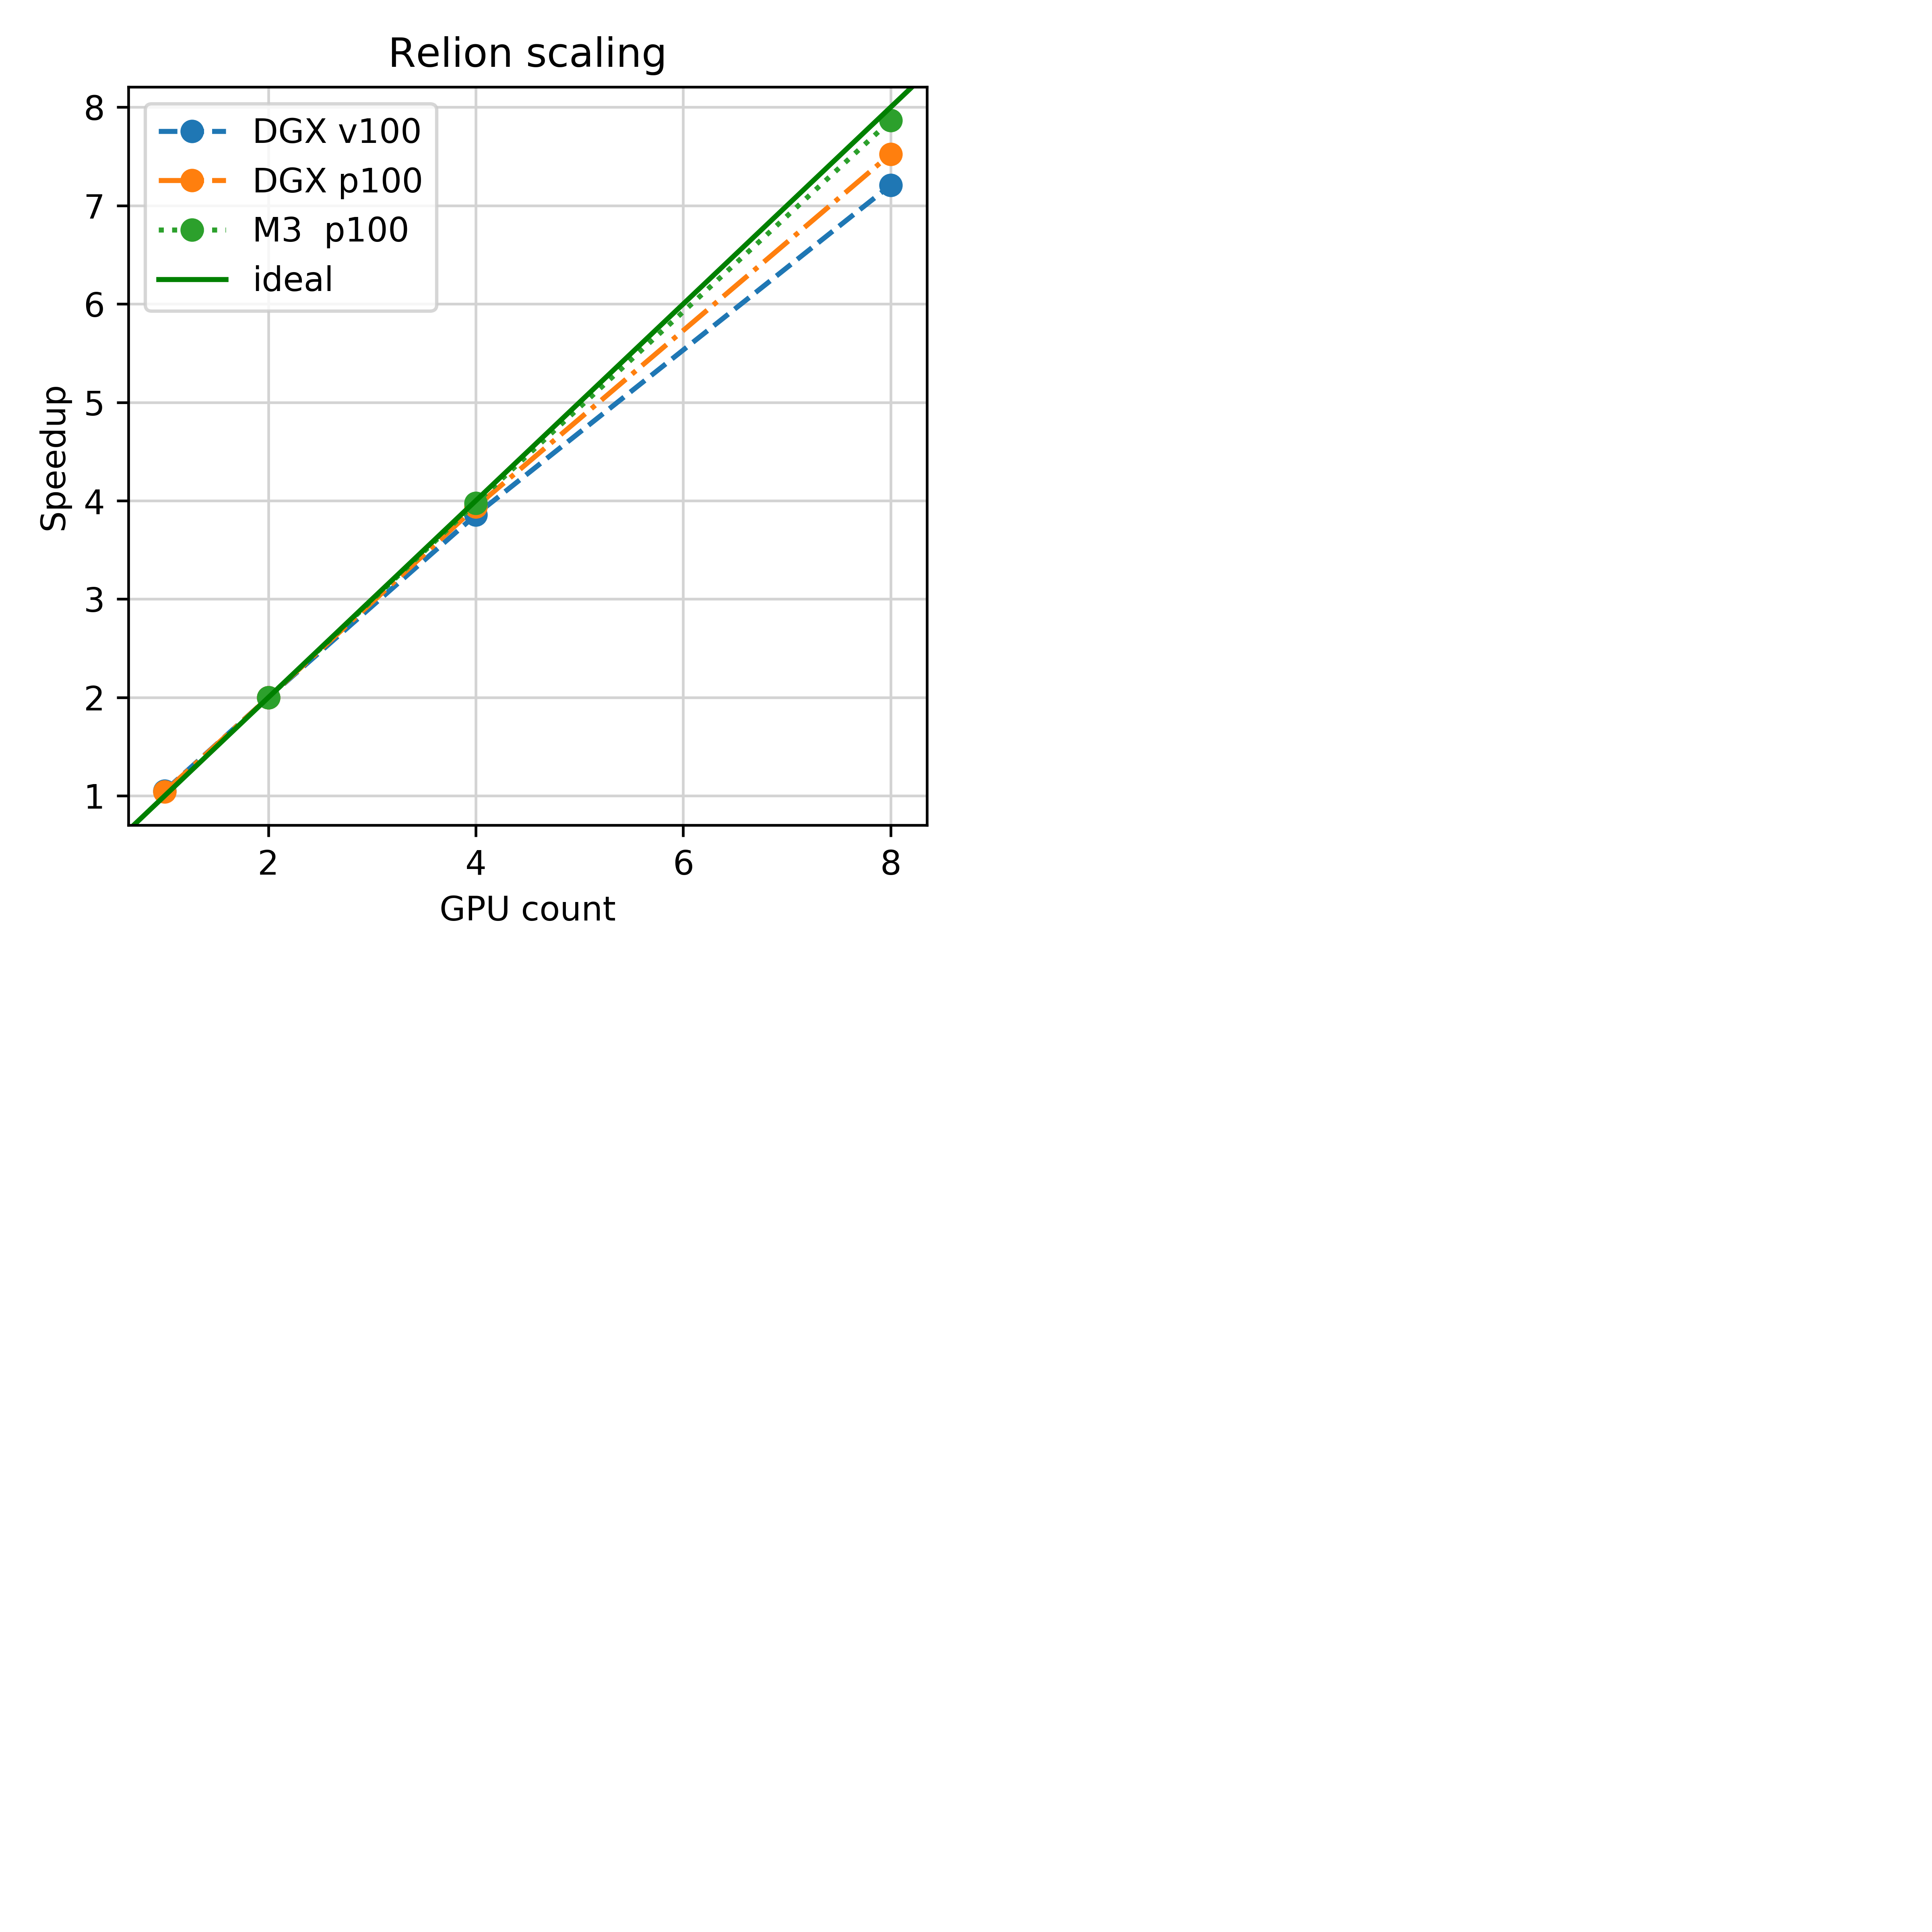

In [15]:
fig = plt.figure(figsize=(4,4),dpi=300)

ax2 = fig.add_subplot(111,title="Relion scaling")
ax2.set_ylabel("Speedup")
ax2.set_xlabel("GPU count")

for njobs in ((dgx2dclass_v100_arr,'DGX v100','--'),(dgx2dclass_arr,'DGX p100','-.'),(m32dclass_arr,'M3  p100',':'),):
#     add_ax_iterations(njobs[0],njobs[1], njobs[2])
    add_ax_scaling(njobs[0],njobs[1], njobs[2])

import matplotlib.lines as mlines
# singlegputime = 5./dgx2dclass_arr[np.where(dgx2dclass_arr[:,0]==1.),1]
# line = mlines.Line2D([1, 8], [singlegputime, 8*singlegputime], color='green')
line = mlines.Line2D([0, 10], [0,10], color='green', label='ideal')
ax2.add_line(line)


ax2.legend()
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='lightgray')
ax2.xaxis.grid(color='lightgray')

plt.tight_layout()
fig.savefig("relion_scaling.png")



fig.show()